This notebook extract photos from .bson file and split images in several folders. First split: single, additional. Second split: small, all.

## 0. Imports

In [1]:
import bson
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import random
import csv

## 1. Split and save all images for tree models: main, single, additional. Applied 2 splits: train/valid, all/small.

### Create folders

In [2]:
out_folder_base = './data/files/'

In [3]:
out_folder_train = out_folder_base + 'train'
out_folder_valid = out_folder_base + 'valid'
out_folder_train_small = out_folder_base + 'train_small'
out_folder_valid_small = out_folder_base + 'valid_small'

# Create output folders
if not os.path.exists(out_folder_train):
    os.makedirs(out_folder_train)
if not os.path.exists(out_folder_valid):
    os.makedirs(out_folder_valid)
#if not os.path.exists(out_folder_train_small):
#    os.makedirs(out_folder_train_small)
#if not os.path.exists(out_folder_valid_small):
#    os.makedirs(out_folder_valid_small)

In [16]:
out_folder_train_single = out_folder_base + 'train_single'
out_folder_valid_single = out_folder_base + 'valid_single'
out_folder_train_small_single = out_folder_base + 'train_small_single'
out_folder_valid_small_single = out_folder_base + 'valid_small_single'

# Create output folders
if not os.path.exists(out_folder_train_single):
    os.makedirs(out_folder_train_single)
if not os.path.exists(out_folder_valid_single):
    os.makedirs(out_folder_valid_single)
if not os.path.exists(out_folder_train_small_single):
    os.makedirs(out_folder_train_small_single)
if not os.path.exists(out_folder_valid_small_single):
    os.makedirs(out_folder_valid_small_single)

In [17]:
out_folder_train_additional = out_folder_base + 'train_additional'
out_folder_valid_additional = out_folder_base + 'valid_additional'
out_folder_train_small_additional = out_folder_base + 'train_small_additional'
out_folder_valid_small_additional = out_folder_base + 'valid_small_additional'

# Create output folders
if not os.path.exists(out_folder_train_additional):
    os.makedirs(out_folder_train_additional)
if not os.path.exists(out_folder_valid_additional):
    os.makedirs(out_folder_valid_additional)
if not os.path.exists(out_folder_train_small_additional):
    os.makedirs(out_folder_train_small_additional)
if not os.path.exists(out_folder_valid_small_additional):
    os.makedirs(out_folder_valid_small_additional)

In [4]:
# Create categories folders for train
categories = pd.read_csv('./data/category_names.csv', index_col='category_id')

for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid, str(category)))
    
#for category in tqdm(categories.index):
#    os.mkdir(os.path.join(out_folder_train_single, str(category)))
#for category in tqdm(categories.index):
#    os.mkdir(os.path.join(out_folder_valid_single, str(category)))
#    
#for category in tqdm(categories.index):
#    os.mkdir(os.path.join(out_folder_train_additional, str(category)))
#for category in tqdm(categories.index):
#    os.mkdir(os.path.join(out_folder_valid_additional, str(category)))

100%|██████████| 5270/5270 [00:00<00:00, 49621.58it/s]


In [19]:
categories_small = categories.index.values.tolist()
for i in range(int(len(categories.index)*0.8)):
    categories_small.pop(random.randrange(len(categories_small)))

#for category in tqdm(categories_small):
#    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
#        os.mkdir(os.path.join(out_folder_train_small, str(category)))
#for category in tqdm(categories_small):
#    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
#        os.mkdir(os.path.join(out_folder_valid_small, str(category)))
        
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small_single, str(category))):
        os.mkdir(os.path.join(out_folder_train_small_single, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small_single, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small_single, str(category)))

for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small_additional, str(category))):
        os.mkdir(os.path.join(out_folder_train_small_additional, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small_additional, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small_additional, str(category)))


100%|██████████| 1054/1054 [00:00<00:00, 32732.09it/s]

In [5]:
def save_image(valid, out_folder_train, out_folder_valid, _id, e, pic):
    if valid:
        fname = os.path.join(out_folder_valid, str(category), '{}-{}.jpg'.format(_id, e))
    else:
        fname = os.path.join(out_folder_train, str(category), '{}-{}.jpg'.format(_id, e))
    with open(fname, 'wb') as f:
        f.write(pic['picture'])

### Split and save

In [6]:
valid_ids = []
with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        valid = False
        category = d['category_id']
        _id = d['_id']
        if random.random() < 0.05:
            valid = True
        for e, pic in enumerate(d['imgs']):
            save_image(valid, out_folder_train, out_folder_valid, _id, e, pic)
            #if e == 0:
            #    save_image(valid, out_folder_train_single, out_folder_valid_single, _id, e, pic)
            #else:
            #    save_image(valid, out_folder_train_additional, out_folder_valid_additional, _id, e, pic)
            #if random.random() < 0.2:
                #if category in categories_small:
                    #save_image(valid, out_folder_train_small, out_folder_valid_small, _id, e, pic)
                    #if e == 0:
                    #    save_image(valid, out_folder_train_small_single, out_folder_valid_small_single, _id, e, pic)
                    #else:
                    #    save_image(valid, out_folder_train_small_additional, out_folder_valid_small_additional, _id, e, pic)
#with open("./data/valid_ids.csv", "wb") as f:
#    writer = csv.writer(f)
#    writer.writerow(valid_ids)

7069896it [11:23, 10338.82it/s]


## 1.a Single first image per product save

In [14]:
import random
from multiprocessing import Pool

#categories_small = categories.index.values.tolist()
#for i in range(int(len(categories.index)*0.8)):
#    categories_small.pop(random.randrange(len(categories_small)))
categories_small = os.listdir('./data/files/train_small')
    
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
        os.mkdir(os.path.join(out_folder_train_small, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small, str(category)))


with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    #p = Pool(4)
    #p.map(fast, enumerate(data))
    for c, d in tqdm(enumerate(data)):
        valid = False
        if random.random() < 0.05:
            valid = True
        category = d['category_id']
        _id = d['_id']
        pic = d['imgs'][0]
        if valid:
            fname = os.path.join(out_folder_valid, str(category), '{}.jpg'.format(_id))
        else:
            fname = os.path.join(out_folder_train, str(category), '{}.jpg'.format(_id))
        with open(fname, 'wb') as f:
            f.write(pic['picture'])
        if random.random() < 0.2:
            if str(category) in categories_small:
                if valid:
                    fname2 = os.path.join(out_folder_valid_small, str(category), '{}.jpg'.format(_id))
                else:
                    fname2 = os.path.join(out_folder_train_small, str(category), '{}.jpg'.format(_id))
                with open(fname2, 'wb') as f:
                    f.write(pic['picture'])

100%|██████████| 1054/1054 [00:00<00:00, 255242.29it/s]
7069896it [13:38, 8641.05it/s] 


## 1b. Saving additional photos

In [ ]:
out_folder_train = './data/files/train_additional'
out_folder_valid = './data/files/valid_additional'
out_folder_train_small = './data/files/train_small_additional'
out_folder_valid_small = './data/files/valid_small_additional'

# Create output folder
if not os.path.exists(out_folder_train):
    os.makedirs(out_folder_train)
if not os.path.exists(out_folder_valid):
    os.makedirs(out_folder_valid)
if not os.path.exists(out_folder_train_small):
    os.makedirs(out_folder_train_small)
if not os.path.exists(out_folder_valid_small):
    os.makedirs(out_folder_valid_small)

categories_small = os.listdir('./data/files/train_small')
#print(categories_small)
    
# Create categories folders for train
categories = pd.read_csv('./data/category_names.csv', index_col='category_id')

for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid, str(category)))
    

for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
        os.mkdir(os.path.join(out_folder_train_small, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small, str(category)))

with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        valid = False
        if random.random() < 0.2:
            valid = True
        category = d['category_id']
        _id = d['_id']
        pics = d['imgs']
        if len(pics) >= 2:
            for i in range(1, len(pics), 1):
                pic = pics[i]
                if valid:
                    fname = os.path.join(out_folder_valid, str(category), '{}_{}.jpg'.format(_id, i))
                else:
                    fname = os.path.join(out_folder_train, str(category), '{}_{}.jpg'.format(_id, i))
                with open(fname, 'wb') as f:
                    f.write(pic['picture'])
                if random.random() < 0.2:
                    if str(category) in categories_small:
                        if valid:
                            fname2 = os.path.join(out_folder_valid_small, str(category), '{}_{}.jpg'.format(_id, i))
                        else:
                            fname2 = os.path.join(out_folder_train_small, str(category), '{}_{}.jpg'.format(_id, i))
                        with open(fname2, 'wb') as f:
                            f.write(pic['picture'])

## 2. Statistics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
out_folder = './data/files/train_small'
df = pd.DataFrame(columns = ('category', 'count'))
for category in os.listdir(out_folder):
    #os.mkdir(os.path.join(out_folder_val, str(category)))
    files = os.listdir(os.path.join(out_folder, category))
    length = len(files)
    df.loc[len(df)] = [category, length]
    #print(str(category) +' - ' +  str(length))
df.head()

NameError: name 'pd' is not defined

(array([ 823.,  103.,   38.,   24.,   13.,   11.,    5.,    5.,    1.,
           5.,    2.,    3.,    2.,    3.,    0.,    1.,    0.,    1.,
           1.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    1.,    5.]),
 array([  1.00000000e+00,   2.58640000e+02,   5.16280000e+02,
          7.73920000e+02,   1.03156000e+03,   1.28920000e+03,
          1.54684000e+03,   1.80448000e+03,   2.06212000e+03,
          2.31976000e+03,   2.57740000e+03,   2.83504000e+03,
          3.09268000e+03,   3.35032000e+03,   3.60796000e+03,
          3.86560000e+03,   4.12324000e+03,   4.38088000e+03,
          4.63852000e+03,   4.89616000e+03,   5.15380000e+03,
          5.41144000e+03,   5.66908000e+03,   5.92672000e+03,
          6.18436000e+03,   6.44200000e+03,   6.69964000e+03,
          6.95728000e+03,   7.21492000e+03

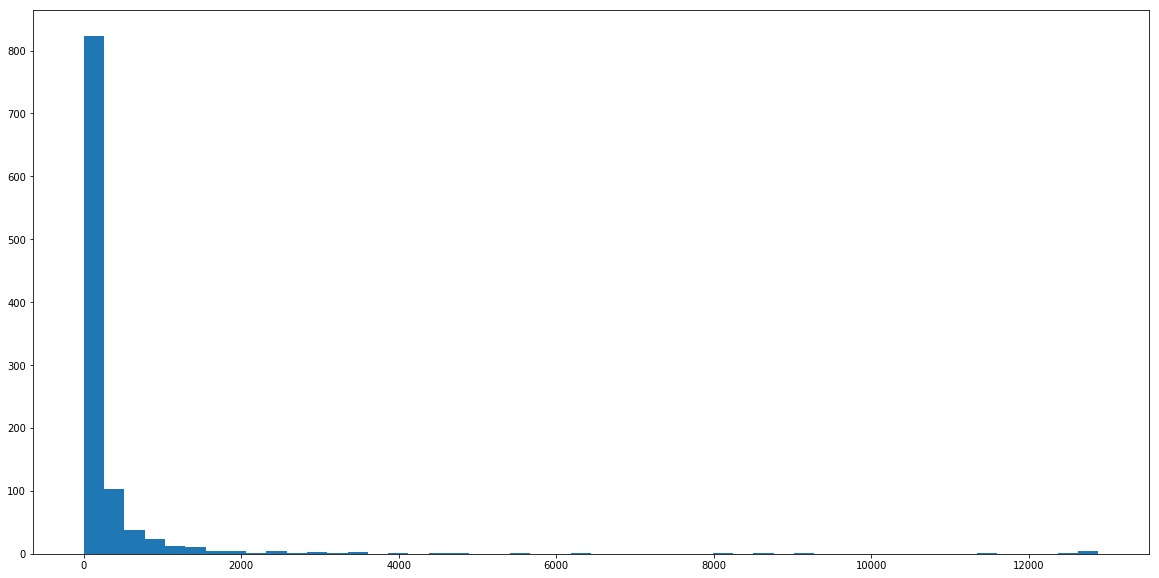

In [13]:
plt.figure(figsize=(20,10))
plt.hist(df['count'], bins=50)

## 3. Saving test data

In [ ]:
with open('./data/test.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        #print(c)
        #print(d)
        valid = False
        #category = d['category_id']
        _id = d['_id']
        i = 1
        for e, pic in enumerate(d['imgs']):
            print(i)
            i += 1
            #fname = os.path.join(out_folder_test, str(category), '{}-{}.jpg'.format(_id, e))
            #with open(fname, 'wb') as f:
            #    f.write(pic['picture'])


## 4. Show some photos

1000003971
10752777-3.jpg


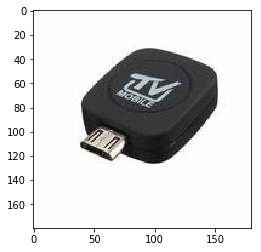

14849303-1.jpg


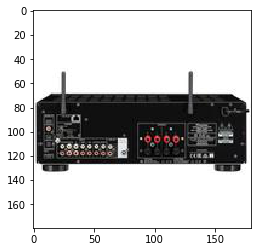

16578914-0.jpg


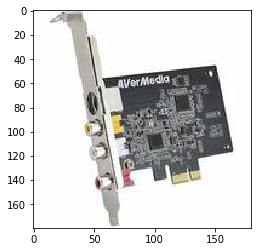

16578914-1.jpg


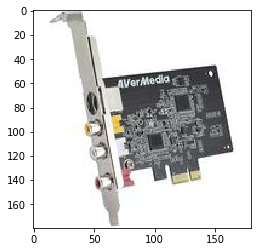

17406870-1.jpg


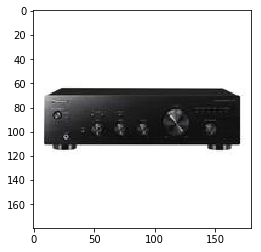

18388588-0.jpg


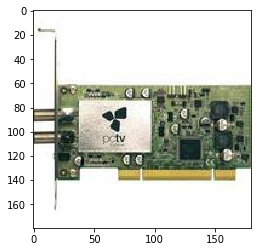

21179409-3.jpg


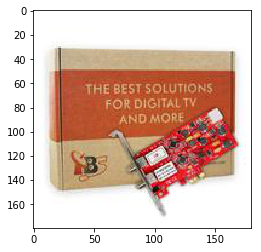

22992031-0.jpg


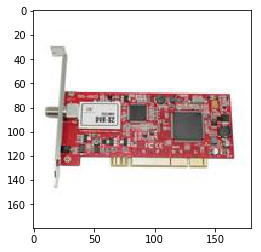

22992031-1.jpg


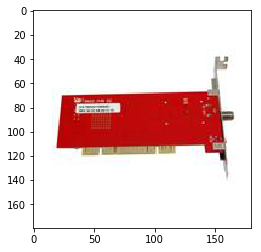

23460765-0.jpg


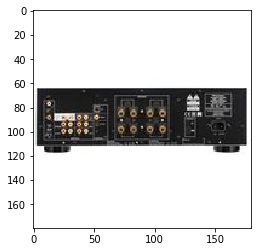

23460765-1.jpg


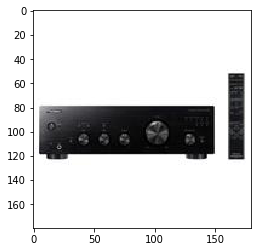

23605500-0.jpg


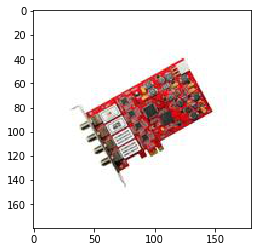

3718157-3.jpg


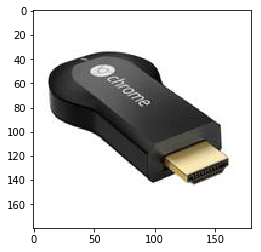

4479442-0.jpg


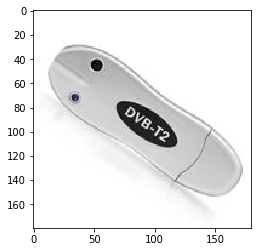

4479442-3.jpg


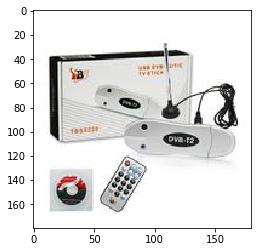

IndexError: list index out of range

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.image as mpimg

folder = './data/files/train_small'
categories = os.listdir(folder)
category = categories[5] 
print(category)
files = os.listdir(os.path.join(folder, category))
files.sort()
#print(type(files))
for i in range(0, 30, 1):
    print(str(files[i]))
    img = mpimg.imread(os.path.join(folder, category, files[i]))
    plt.imshow(img)
    plt.show()